# K Means Clustering

A ML technique to discover groups in data.

Groups/clusters are can be identified in multiple dimensions.

#### How?

STEP1: Choose the number K of clusters

STEP2: Select at random K points, the centroids (not necessarily from the data set)

STEP3: Assign each data point to closest centroid to form K clusters

STEP4: Compute and place the new centroid (centre of mass) of each cluster

STEP5: Reassign each data point t the new closest centroid. If an reassignment took place, go to step 4, otherwise finish

#### Random Initialisation Trap

Can get by this through the K-means++ algorithm (research).

#### Choosing the right number of clusters

Obvious good to visualise the data if its 1,2,3 dimensional. 

Can also take the sum of square of the distances between the K centroids and the data points. Minimising this values (WCSS) is a good measure.

The WCSS can be plotted as the number clusters increases. This is an arbitrary method, called the ELBOW METHOD, and thus is down to the discretion of the data scientist.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Information on mall customers that use a membership card. A computed metric 'Spending score' indicates how much the customer spends. You've been hired to find clusters of data that includes the features annual income and spending score.

In [4]:
X = dataset.iloc[:, [3, 4]].values
X.shape

(200, 2)

Text(0, 0.5, 'WCSS')

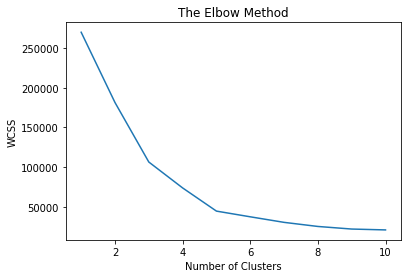

In [7]:
# Find optimial number of clusters, elbow method.
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

Can see from the graph, the elbow is clearly at 5 clusters

In [8]:
# Applying k-means to mall dataset

kmeans = KMeans(n_clusters=5, init='k-means++',
                max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# y_kmeans is an array of the cluster numbers for each corresponding data point

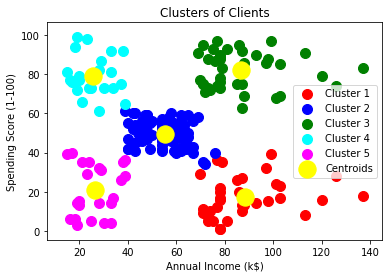

In [11]:
# Visualise the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
            s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
            s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1],
            s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1],
            s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend();

Can analyse clusters and change labels

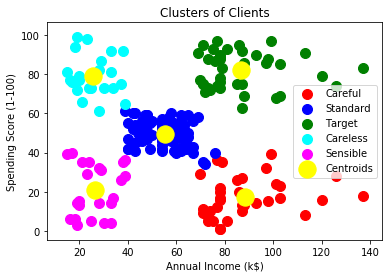

In [12]:
# Visualise the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
            s=100, c='red', label='Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
            s=100, c='blue', label='Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s=100, c='green', label='Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1],
            s=100, c='cyan', label='Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1],
            s=100, c='magenta', label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend();